# 9 - Advanced topics - 1 axis torque tube Shading for 1 day (Research Documentation)
## Recreating JPV 2019 / PVSC 2018 Fig. 13


Calculating and plotting shading from torque tube on 1-axis tracking for 1 day, which is figure 13 in: 

            Ayala Pelaez S, Deline C, Greenberg P, Stein JS, Kostuk RK. Model and validation of single-axis tracking with bifacial PV. IEEE J Photovoltaics. 2019;9(3):715–21. https://ieeexplore.ieee.org/document/8644027 and https://www.nrel.gov/docs/fy19osti/72039.pdf (pre-print, conference version)


This is what we will re-create:
![Ayala JPV-2](../images_wiki/JPV_Ayala_Fig13.PNG)

Use bifacial_radiance minimum v. 0.3.1 or higher. Many things have been updated since this paper, simplifying the generation of this plot:

<ul>
    <li> Sensor position is now always generated E to W on N-S tracking systems, so same sensor positions can just be added for this calculation at the end without needing to flip the sensors. </li>
    <li> Torquetubes get automatically generated in makeModule. Following PVSC 2018 paper, rotation is around the modules and not around the torque tube axis (which is a new feature) </li>
    <li> Simulating only 1 day on single-axis tracking easier with cumulativesky = False and gendaylit1axis(startdate='06/24', enddate='06/24' </li> 
    <li> Sensors get generated very close to surface, so all results are from the module surface and not the torquetube for this 1-UP case. </li>
</ul>

## Steps:

<ol>
    <li> <a href='#step1'> Running the simulations for all the cases: </li>
    <ol type='A'> 
        <li> <a href='#step1a'>Baseline Case: No Torque Tube </a></li>
        <li> <a href='#step1b'> Zgap = 0.1 </a></li>
        <li> <a href='#step1c'> Zgap = 0.2 </a></li>
        <li> <a href='#step1d'> Zgap = 0.3 </a></li>
    </ol>
    <li> <a href='#step2'> Read-back the values and tabulate average values for unshaded, 10cm gap and 30cm gap </a></li>
    <li> <a href='#step3'> Plot spatial loss values for 10cm and 30cm data </a></li>
    <li> <a href='#step4'> Overall Shading Factor (for 1 day) </a></li>
</ol>



<a id='step1'></a>

### 1. Running the simulations for all the cases

In [1]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent / 'bifacial_radiance' / 'TEMP')

# You can alternatively point to an empty directory (it will open a load GUI Visual Interface)
# or specify any other directory in your computer. I.E.:
# testfolder = r'C:\Users\sayala\Documents\RadianceScenes\Demo'

print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP


In [2]:
# VARIABLES of the simulation: 
lat = 35.1 # ABQ
lon = -106.7 # ABQ
x=1
y = 2 
numpanels=1
limit_angle = 45 # tracker rotation limit angle
albedo = 'concrete'     # ground albedo
hub_height = y*0.75   # H = 0.75 
gcr = 0.35  
pitch = y/gcr
#pitch = 1.0/gcr # Check from 1Axis_Shading_PVSC2018 file
cumulativesky = False # needed for set1axis and makeScene1axis so simulation is done hourly not with gencumsky.
limit_angle = 45 # tracker rotation limit angle
nMods=10
nRows=3
sensorsy = 200
module_type='2m_panel'
datewanted='06/24' # sunny day 6/24/1972 (index 4180 - 4195)

## Torque tube info
torquetube = False # redefined on each simulation below, since we need to compare with and without torque tube.
tubetype='round'
material = 'Metal_Grey'
diameter = 0.1
axisofrotationTorqueTube = False   # Original PVSC version rotated around the modules like most other software.
# Variables that will get defined on each iteration below:
zgap = 0 # 0.2, 0.3 values tested. Re-defined on each simulation.
torquetube = False # baseline is no torque tube. 

In [3]:
# Simulation Start.

try:
    import bifacial_radiance
except ImportError:
    raise RuntimeError('bifacial_radiance is required. download distribution')
import numpy as np

print(bifacial_radiance.__version__)

demo = bifacial_radiance.RadianceObj(path = testfolder)  
demo.setGround(albedo)
epwfile = demo.getEPW(lat, lon) 
metdata = demo.readEPW(epwfile) 
trackerdict = demo.set1axis(metdata, limit_angle = limit_angle, backtrack = True, gcr = gcr, cumulativesky = False)
trackerdict = demo.gendaylit1axis(startdate=datewanted, enddate=datewanted) 
sceneDict = {'pitch':pitch,'hub_height':hub_height, 'nMods': nMods, 'nRows': nRows}  

0.3.2
path = F:\Documents\Python Scripts\bifacial_radiance\TEMP
Getting weather file: USA_NM_Albuquerque.723650_TMY2.epw
 ... OK!


C:\Users\cdeline\anaconda3\envs\py27\lib\site-packages\bifacial_radiance\main.py:2465: pvlibDeprecationWarning: The get_sun_rise_set_transit function was deprecated in pvlib 0.6.1 and will be removed in 0.7. Use sun_rise_set_transit_spa instead.
  sunup= pvlib.irradiance.solarposition.get_sun_rise_set_transit(datetimetz, lat, lon) #only for pvlib <0.6.1


Creating ~4000 skyfiles.  Takes 1-2 minutes
Created 14 skyfiles in /skies/


C:\Users\cdeline\anaconda3\envs\py27\lib\site-packages\pvlib\tracking.py:431: RuntimeWarning: invalid value encountered in less
  tracker_theta = np.where(wid < 0, wid + wc, wid - wc)
C:\Users\cdeline\anaconda3\envs\py27\lib\site-packages\pvlib\tracking.py:435: RuntimeWarning: invalid value encountered in greater
  tracker_theta[tracker_theta > max_angle] = max_angle
C:\Users\cdeline\anaconda3\envs\py27\lib\site-packages\pvlib\tracking.py:436: RuntimeWarning: invalid value encountered in less
  tracker_theta[tracker_theta < -max_angle] = -max_angle
C:\Users\cdeline\anaconda3\envs\py27\lib\site-packages\pvlib\tracking.py:543: RuntimeWarning: invalid value encountered in less
  surface_azimuth[surface_azimuth < 0] += 360
C:\Users\cdeline\anaconda3\envs\py27\lib\site-packages\pvlib\tracking.py:544: RuntimeWarning: invalid value encountered in greater_equal
  surface_azimuth[surface_azimuth >= 360] -= 360
C:\Users\cdeline\anaconda3\envs\py27\lib\site-packages\pandas\core\series.py:1999: Ru

<a id='step1a'></a>

### A. Baseline Case: No Torque Tube

When torquetube is False, zgap is the distance from axis of torque tube to module surface, but since we are rotating from the module's axis, this Zgap doesn't matter for this baseline case.

In [6]:
#CASE 0 No torque tube
# When torquetube is False, zgap is the distance from axis of torque tube to module surface, but since we are rotating from the module's axis, this Zgap doesn't matter.
# zgap = 0.1 + diameter/2.0  
torquetube = False 
customname = '_NoTT'
demo.makeModule(name=module_type,x=x,y=y, numpanels=numpanels, torquetube=torquetube, axisofrotationTorqueTube=axisofrotationTorqueTube)
trackerdict = demo.makeScene1axis(trackerdict,module_type,sceneDict, cumulativesky = cumulativesky) 
trackerdict = demo.makeOct1axis(trackerdict)
trackerdict = demo.analysis1axis(trackerdict, sensorsy = sensorsy, customname = customname)


('\nModule Name:', '2m_panel')
REWRITING pre-existing module file. 
Module 2m_panel successfully created

Making ~4000 .rad files for gendaylit 1-axis workflow (this takes a minute..)
14 Radfiles created in /objects/

Making 14 octfiles for 1-axis tracking in root directory.
Created 1axis_06_24_06.oct
Created 1axis_06_24_07.oct
Created 1axis_06_24_08.oct
Created 1axis_06_24_09.oct
Created 1axis_06_24_19.oct
Created 1axis_06_24_18.oct
Created 1axis_06_24_11.oct
Created 1axis_06_24_10.oct
Created 1axis_06_24_13.oct
Created 1axis_06_24_12.oct
Created 1axis_06_24_15.oct
Created 1axis_06_24_14.oct
Created 1axis_06_24_17.oct
Created 1axis_06_24_16.oct
Linescan in process: 1axis_06_24_06_NoTT_Front
Linescan in process: 1axis_06_24_06_NoTT_Back
Saved: results\irr_1axis_06_24_06_NoTT.csv
Index: 06_24_06. Wm2Front: 161.420425167. Wm2Back: 17.1202325333
Linescan in process: 1axis_06_24_07_NoTT_Front
Linescan in process: 1axis_06_24_07_NoTT_Back
Saved: results\irr_1axis_06_24_07_NoTT.csv
Index: 06

<a id='step1b'></a>

### B. ZGAP = 0.1

In [7]:
#ZGAP 0.1 
zgap = 0.1
torquetube = True
customname = '_zgap0.1'
demo.makeModule(name=module_type,x=x,y=y, numpanels=numpanels,tubetype=tubetype, zgap=zgap, torquetube=torquetube, diameter=diameter, material=material, axisofrotationTorqueTube=axisofrotationTorqueTube)
trackerdict = demo.makeScene1axis(trackerdict,module_type,sceneDict, cumulativesky = cumulativesky) 
trackerdict = demo.makeOct1axis(trackerdict)
trackerdict = demo.analysis1axis(trackerdict, sensorsy = sensorsy, customname = customname)

('\nModule Name:', '2m_panel')
REWRITING pre-existing module file. 
Module 2m_panel successfully created

Making ~4000 .rad files for gendaylit 1-axis workflow (this takes a minute..)
14 Radfiles created in /objects/

Making 14 octfiles for 1-axis tracking in root directory.
Created 1axis_06_24_06.oct
Created 1axis_06_24_07.oct
Created 1axis_06_24_08.oct
Created 1axis_06_24_09.oct
Created 1axis_06_24_19.oct
Created 1axis_06_24_18.oct
Created 1axis_06_24_11.oct
Created 1axis_06_24_10.oct
Created 1axis_06_24_13.oct
Created 1axis_06_24_12.oct
Created 1axis_06_24_15.oct
Created 1axis_06_24_14.oct
Created 1axis_06_24_17.oct
Created 1axis_06_24_16.oct
Linescan in process: 1axis_06_24_06_zgap0.1_Front
Linescan in process: 1axis_06_24_06_zgap0.1_Back
Saved: results\irr_1axis_06_24_06_zgap0.1.csv
Index: 06_24_06. Wm2Front: 161.539838667. Wm2Back: 16.3351245717
Linescan in process: 1axis_06_24_07_zgap0.1_Front
Linescan in process: 1axis_06_24_07_zgap0.1_Back
Saved: results\irr_1axis_06_24_07_zga

<a id='step1c'></a>

### C. ZGAP = 0.2

In [8]:
#ZGAP 0.2
zgap = 0.2
torquetube = True
customname = '_zgap0.2'
demo.makeModule(name=module_type,x=x,y=y, numpanels=numpanels,tubetype=tubetype, zgap=zgap, torquetube=torquetube, diameter=diameter, material=material, axisofrotationTorqueTube=axisofrotationTorqueTube)
trackerdict = demo.makeScene1axis(trackerdict,module_type,sceneDict, cumulativesky = cumulativesky) 
trackerdict = demo.makeOct1axis(trackerdict)
trackerdict = demo.analysis1axis(trackerdict, sensorsy = sensorsy, customname = customname)

('\nModule Name:', '2m_panel')
REWRITING pre-existing module file. 
Module 2m_panel successfully created

Making ~4000 .rad files for gendaylit 1-axis workflow (this takes a minute..)
14 Radfiles created in /objects/

Making 14 octfiles for 1-axis tracking in root directory.
Created 1axis_06_24_06.oct
Created 1axis_06_24_07.oct
Created 1axis_06_24_08.oct
Created 1axis_06_24_09.oct
Created 1axis_06_24_19.oct
Created 1axis_06_24_18.oct
Created 1axis_06_24_11.oct
Created 1axis_06_24_10.oct
Created 1axis_06_24_13.oct
Created 1axis_06_24_12.oct
Created 1axis_06_24_15.oct
Created 1axis_06_24_14.oct
Created 1axis_06_24_17.oct
Created 1axis_06_24_16.oct
Linescan in process: 1axis_06_24_06_zgap0.2_Front
Linescan in process: 1axis_06_24_06_zgap0.2_Back
Saved: results\irr_1axis_06_24_06_zgap0.2.csv
Index: 06_24_06. Wm2Front: 161.427369333. Wm2Back: 16.4130201667
Linescan in process: 1axis_06_24_07_zgap0.2_Front
Linescan in process: 1axis_06_24_07_zgap0.2_Back
Saved: results\irr_1axis_06_24_07_zga

<a id='step1d'></a>

### D. ZGAP = 0.3

In [9]:
#ZGAP 0.3
zgap = 0.3
torquetube = True
customname = '_zgap0.3'
demo.makeModule(name=module_type,x=x,y=y, numpanels=numpanels,tubetype=tubetype, zgap=zgap, torquetube=torquetube, diameter=diameter, material=material, axisofrotationTorqueTube=axisofrotationTorqueTube)
trackerdict = demo.makeScene1axis(trackerdict,module_type,sceneDict, cumulativesky = cumulativesky) 
trackerdict = demo.makeOct1axis(trackerdict)
trackerdict = demo.analysis1axis(trackerdict, sensorsy = sensorsy, customname = customname)

('\nModule Name:', '2m_panel')
REWRITING pre-existing module file. 
Module 2m_panel successfully created

Making ~4000 .rad files for gendaylit 1-axis workflow (this takes a minute..)
14 Radfiles created in /objects/

Making 14 octfiles for 1-axis tracking in root directory.
Created 1axis_06_24_06.oct
Created 1axis_06_24_07.oct
Created 1axis_06_24_08.oct
Created 1axis_06_24_09.oct
Created 1axis_06_24_19.oct
Created 1axis_06_24_18.oct
Created 1axis_06_24_11.oct
Created 1axis_06_24_10.oct
Created 1axis_06_24_13.oct
Created 1axis_06_24_12.oct
Created 1axis_06_24_15.oct
Created 1axis_06_24_14.oct
Created 1axis_06_24_17.oct
Created 1axis_06_24_16.oct
Linescan in process: 1axis_06_24_06_zgap0.3_Front
Linescan in process: 1axis_06_24_06_zgap0.3_Back
Saved: results\irr_1axis_06_24_06_zgap0.3.csv
Index: 06_24_06. Wm2Front: 161.425258833. Wm2Back: 16.48608815
Linescan in process: 1axis_06_24_07_zgap0.3_Front
Linescan in process: 1axis_06_24_07_zgap0.3_Back
Saved: results\irr_1axis_06_24_07_zgap0

<a id='step2'></a>

### 2. Read-back the values and tabulate average values for unshaded, 10cm gap and 30cm gap


In [7]:
import glob
import pandas as pd

resultsfolder = os.path.join(testfolder, 'results')
print (resultsfolder)
filenames = glob.glob(os.path.join(resultsfolder,'*.csv'))
noTTlist = [k for k in filenames if 'NoTT' in k]
zgap10cmlist = [k for k in filenames if 'zgap0.1' in k]
zgap20cmlist = [k for k in filenames if 'zgap0.2' in k]
zgap30cmlist = [k for k in filenames if 'zgap0.3' in k]

# sum across all hours for each case
unsh_front = np.array([pd.read_csv(f, engine='python')['Wm2Front'] for f in noTTlist]).sum(axis = 0)
cm10_front = np.array([pd.read_csv(f, engine='python')['Wm2Front'] for f in zgap10cmlist]).sum(axis = 0)
cm20_front = np.array([pd.read_csv(f, engine='python')['Wm2Front'] for f in zgap20cmlist]).sum(axis = 0)
cm30_front = np.array([pd.read_csv(f, engine='python')['Wm2Front'] for f in zgap30cmlist]).sum(axis = 0)
unsh_back = np.array([pd.read_csv(f, engine='python')['Wm2Back'] for f in noTTlist]).sum(axis = 0)
cm10_back = np.array([pd.read_csv(f, engine='python')['Wm2Back'] for f in zgap10cmlist]).sum(axis = 0)
cm20_back = np.array([pd.read_csv(f, engine='python')['Wm2Back'] for f in zgap20cmlist]).sum(axis = 0)
cm30_back = np.array([pd.read_csv(f, engine='python')['Wm2Back'] for f in zgap30cmlist]).sum(axis = 0)

F:\Documents\Python Scripts\bifacial_radiance_PVSC2018_rerun\results


<a id='step3'></a>

### 3. plot spatial loss values for 10cm and 30cm data

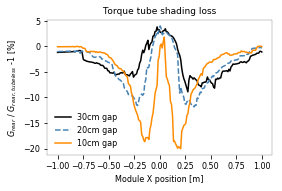

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Helvetica']
plt.rcParams['axes.linewidth'] = 0.2 #set the value globally

fig = plt.figure()
fig.set_size_inches(4, 2.5)
ax = fig.add_axes((0.15,0.15,0.78,0.75))
#plt.rc('font', family='sans-serif')
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
plt.rc('axes',labelsize=8)
plt.plot(np.linspace(-1,1,unsh_back.__len__()),(cm30_back - unsh_back)/unsh_back*100, label = '30cm gap',color = 'black')  #steelblue
plt.plot(np.linspace(-1,1,unsh_back.__len__()),(cm20_back - unsh_back)/unsh_back*100, label = '20cm gap',color = 'steelblue', linestyle = '--')  #steelblue
plt.plot(np.linspace(-1,1,unsh_back.__len__()),(cm10_back - unsh_back)/unsh_back*100, label = '10cm gap',color = 'darkorange')  #steelblue
#plt.ylabel('$G_{rear}$ vs unshaded [Wm-2]')#(r'$BG_E$ [%]')
plt.ylabel('$G_{rear}$ / $G_{rear,tubeless}$ -1 [%]')
plt.xlabel('Module X position [m]')
plt.legend(fontsize = 8,frameon = False,loc='best')
#plt.ylim([0, 15])
plt.title('Torque tube shading loss',fontsize=9)
#plt.annotate('South',xy=(-10,9.5),fontsize = 8); plt.annotate('North',xy=(8,9.5),fontsize = 8)
plt.show()

<a id='step4'></a>

### 4. Overall Shading Loss Factor

To calculate shading loss factor, we can use the following equation:



<img src="../images_wiki/AdvancedJournals/Equation_ShadingFactor.PNG">

In [ ]:
ShadingFactor = (1 - cm30_back.sum() / unsh_back.sum())*100